# Project 4 - West Nile Virus Prediction
Group member
- Larb
- B.B.
- PuNt

Part 2/2

## Modeling

### Import train data

In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.impute import KNNImputer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight


pd.set_option('display.max_columns', 200)

In [38]:
# Import train data from csv
df_train = pd.read_csv('../data/train_df.csv')
df_test = pd.read_csv('../data/test_df.csv')

In [39]:
# Check the data shape
print(df_train.shape)
print(df_test.shape)

# Same as we export in EDA file

(9601, 37)
(116293, 37)


In [40]:
df_train

,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,WnvPresent,Tmax_x,Tmin_x,Tavg_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y,day,month,year
0,2,41,36,1,41.954690,-87.800991,9,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
1,3,41,36,1,41.954690,-87.800991,9,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
2,3,62,30,8,41.994991,-87.769279,9,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
3,2,79,120,15,41.974089,-87.824812,8,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
4,3,79,120,15,41.974089,-87.824812,8,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,2,51,108,27,41.763733,-87.742302,8,1,75,50,63,52,58,2,0,0.0,29.34,30.04,3.8,8,4.2,75,55,65,52,58,0,0,0.0,29.40,30.04,4.1,9,4.6,26,9,2013
9597,2,58,42,139,41.987280,-87.666066,8,0,75,50,63,52,58,2,0,0.0,29.34,30.04,3.8,8,4.2,75,55,65,52,58,0,0,0.0,29.40,30.04,4.1,9,4.6,26,9,2013
9598,2,17,12,140,41.912563,-87.668055,9,0,75,50,63,52,58,2,0,0.0,29.34,30.04,3.8,8,4.2,75,55,65,52,58,0,0,0.0,29.40,30.04,4.1,9,4.6,26,9,2013
9599,2,71,21,141,42.009876,-87.807277,9,0,75,50,63,52,58,2,0,0.0,29.34,30.04,3.8,8,4.2,75,55,65,52,58,0,0,0.0,29.40,30.04,4.1,9,4.6,26,9,2013


In [41]:
# Check baseline
df_train['WnvPresent'].value_counts(normalize=True)


WnvPresent
0    0.94761
1    0.05239
Name: proportion, dtype: float64

In [42]:
# Create X and y and split the data for Train and Test for Modeling
X = df_train.drop('WnvPresent', axis=1)
y = df_train['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)

### Modeling

Let's try as many classification model as we can think of

In [43]:
# Create a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000,  random_state=42, class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Bagged Decision Tree', BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), random_state=42)),
    ('SVM', SVC(random_state=42, probability=True, class_weight='balanced')),
    ('XGBoost', XGBClassifier(random_state=42))
]

# Create empty lists to store ROC AUC scores
train_roc_auc_scores = []
test_roc_auc_scores = []

# Create a dictionary to store trained models
trained_models = {}

# Loop through each model
for model_name, model in models:
    print(f'Evaluating {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Calculate ROC AUC score for the train dataset
    y_train_prob = model.predict_proba(X_train)[:,1]
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    train_roc_auc_scores.append(train_roc_auc)
    
    # Calculate ROC AUC score for the test dataset
    y_test_prob = model.predict_proba(X_test)[:,1]
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    test_roc_auc_scores.append(test_roc_auc)
    
    # Store the model and test score in the dictionary
    trained_models[model_name] = {'model': model, 'test_roc_auc': test_roc_auc}
    
    # Print results
    print(f'{model_name} - Train ROC AUC Score: {train_roc_auc:.2f}')
    print(f'{model_name} - Test ROC AUC Score: {test_roc_auc:.2f}')
    print()

Evaluating Logistic Regression...


Logistic Regression - Train ROC AUC Score: 0.80
Logistic Regression - Test ROC AUC Score: 0.79

Evaluating Decision Tree...
Decision Tree - Train ROC AUC Score: 1.00
Decision Tree - Test ROC AUC Score: 0.63

Evaluating Random Forest...
Random Forest - Train ROC AUC Score: 0.99
Random Forest - Test ROC AUC Score: 0.77

Evaluating AdaBoost...
AdaBoost - Train ROC AUC Score: 0.87
AdaBoost - Test ROC AUC Score: 0.83

Evaluating Gradient Boosting...
Gradient Boosting - Train ROC AUC Score: 0.90
Gradient Boosting - Test ROC AUC Score: 0.85

Evaluating Bagged Decision Tree...
Bagged Decision Tree - Train ROC AUC Score: 0.99
Bagged Decision Tree - Test ROC AUC Score: 0.72

Evaluating SVM...
SVM - Train ROC AUC Score: 0.41
SVM - Test ROC AUC Score: 0.37

Evaluating XGBoost...
XGBoost - Train ROC AUC Score: 0.99
XGBoost - Test ROC AUC Score: 0.84



In [44]:
# Set X_actual
X_actual = df_test

In [45]:
# number of features (columns)
X_actual.shape

(116293, 37)

In [46]:
# make sure columne in test and train are sme

for col in X.columns : # iterate all columns in train data
    if col not in X_actual.columns: # if the column is not in test data
        X_actual[col] = 0 # make the column filled with 0 values

X_actual = X_actual[X.columns] # drop "columns exist only in test data" and sort in the same order

In [47]:
# XGBoost
model_s = XGBClassifier(random_state=42)
model_s.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
# Apply model to predict
y_act = model_s.predict_proba(X_actual)[:,1]

In [49]:
df_submission0 = pd.DataFrame({'Id': df_test['Id'], 'WnvPresent': y_act})
# export df_submission to csv
df_submission0.to_csv('../data/submission0.csv', index=False)

#### Result

XGBoost provides best test ROC AUC score.
Predicted the test data and upload to Kaggle. Received score of 0.696

#### Let's optimize the model

using gridsearch to find best parameter

Default XGBoost Model:
Test ROC AUC Score (Default): 0.84

Best XGBoost Model (Grid Search):
Best Parameters: {'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1.0}
Test ROC AUC Score (Grid Search): 0.85


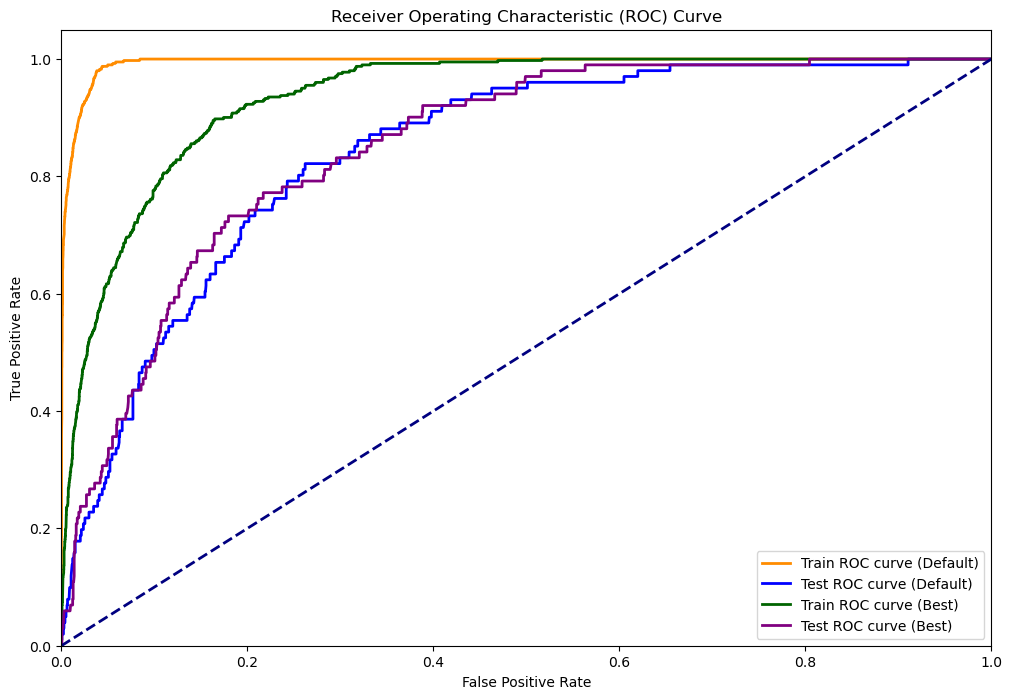

In [50]:
# Using XGBoost

#Step 1: Create a default XGBoost model
default_xgb_model = XGBClassifier(random_state=42)

# Step 2: Train the default XGBoost model on the training data
default_xgb_model.fit(X_train, y_train)

# Step 3: Make predictions on the train and test data using the default model
y_train_pred_default = default_xgb_model.predict_proba(X_train)[:,1]
y_test_pred_default = default_xgb_model.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the default model on train and test data
train_roc_auc_default = roc_auc_score(y_train, y_train_pred_default)
test_roc_auc_default = roc_auc_score(y_test, y_test_pred_default)

# Store the default model's estimator, parameters, and ROC AUC scores
default_estimator = default_xgb_model
default_parameters = default_xgb_model.get_params()
default_score = test_roc_auc_default

# Step 4: Define an extended hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 1.0]
}

# Step 5: Create an XGBoost model for grid search
grid_search_xgb_model = XGBClassifier(random_state=42)

# Step 6: Perform grid search with ROC AUC scoring
grid_search = GridSearchCV(grid_search_xgb_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_xgb_classifier = grid_search.best_estimator_

# Step 8: Make predictions on the train and test data using the best XGBoost model
y_train_pred_best = best_xgb_classifier.predict_proba(X_train)[:,1]
y_test_pred_best = best_xgb_classifier.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the best model on train and test data
train_roc_auc_best = roc_auc_score(y_train, y_train_pred_best)
test_roc_auc_best = roc_auc_score(y_test, y_test_pred_best)

# Store the best model's estimator, parameters, and ROC AUC scores
best_estimator = best_xgb_classifier
best_parameters = best_params
best_score = test_roc_auc_best

# Print the best parameters and ROC AUC scores
print("Default XGBoost Model:")
print(f"Test ROC AUC Score (Default): {test_roc_auc_default:.2f}")

print("\nBest XGBoost Model (Grid Search):")
print(f"Best Parameters: {best_parameters}")
print(f"Test ROC AUC Score (Grid Search): {test_roc_auc_best:.2f}")

# Step 9: Calculate and plot the ROC curves for both models
y_train_prob_default = default_xgb_model.predict_proba(X_train)[:, 1]
y_test_prob_default = default_xgb_model.predict_proba(X_test)[:, 1]

y_train_prob_best = best_xgb_classifier.predict_proba(X_train)[:, 1]
y_test_prob_best = best_xgb_classifier.predict_proba(X_test)[:, 1]

fpr_train_default, tpr_train_default, _ = roc_curve(y_train, y_train_prob_default)
fpr_test_default, tpr_test_default, _ = roc_curve(y_test, y_test_prob_default)

fpr_train_best, tpr_train_best, _ = roc_curve(y_train, y_train_prob_best)
fpr_test_best, tpr_test_best, _ = roc_curve(y_test, y_test_prob_best)

plt.figure(figsize=(12, 8))

# ROC curve for the default model
plt.plot(fpr_train_default, tpr_train_default, color='darkorange', lw=2, label='Train ROC curve (Default)')
plt.plot(fpr_test_default, tpr_test_default, color='blue', lw=2, label='Test ROC curve (Default)')

# ROC curve for the best model
plt.plot(fpr_train_best, tpr_train_best, color='darkgreen', lw=2, label='Train ROC curve (Best)')
plt.plot(fpr_test_best, tpr_test_best, color='purple', lw=2, label='Test ROC curve (Best)')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Since the train data is very "unbalance", let's try resample the data using SMOTE to train another model

Default XGBoost Model:
Test ROC AUC Score (Default): 0.84

Best XGBoost Model (Grid Search):
Best Parameters: {'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 1.0}
Test ROC AUC Score (Grid Search): 0.84


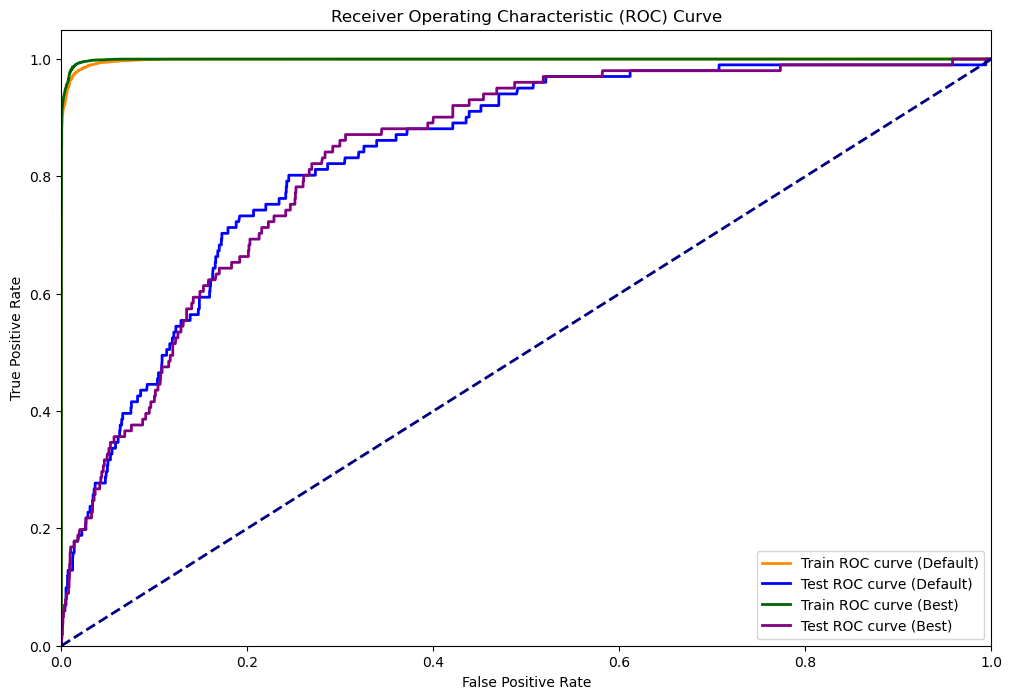

In [51]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Step 1: Create a default XGBoost model
smote_xgb_model = XGBClassifier(random_state=42)

# Step 2: Train the default XGBoost model on the training data
smote_xgb_model.fit(X_train_resampled, y_train_resampled) ##### X train / Y train which already SMOTE

# Step 3: Make predictions on the train and test data using the default model
y_train_pred_smote = smote_xgb_model.predict_proba(X_train_resampled)[:,1]
y_test_pred_smote = smote_xgb_model.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the default model on train and test data
train_roc_auc_smote = roc_auc_score(y_train_resampled, y_train_pred_smote)
test_roc_auc_smote = roc_auc_score(y_test, y_test_pred_smote)

# Store the default model's estimator, parameters, and ROC AUC scores
smote_estimator = smote_xgb_model
smote_parameters = smote_xgb_model.get_params()
smote_score = test_roc_auc_smote

# Step 4: Define an extended hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 1.0]
}

# Step 5: Create an XGBoost model for grid search
grid_search_xgb_model = XGBClassifier(random_state=42)

# Step 6: Perform grid search with ROC AUC scoring
grid_search = GridSearchCV(grid_search_xgb_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 7: Get the best parameters and best estimator from the grid search
best_params_smote = grid_search.best_params_
best_xgb_classifier_smote = grid_search.best_estimator_

# Step 8: Make predictions on the train and test data using the best XGBoost model
y_train_pred_best = best_xgb_classifier_smote.predict_proba(X_train_resampled)[:,1]
y_test_pred_best = best_xgb_classifier_smote.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the best model on train and test data
train_roc_auc_best_smote = roc_auc_score(y_train_resampled, y_train_pred_best)
test_roc_auc_best_smote = roc_auc_score(y_test, y_test_pred_best)

# Store the best model's estimator, parameters, and ROC AUC scores
best_estimator = best_xgb_classifier_smote
best_parameters = best_params_smote
best_score = test_roc_auc_best_smote

# Print the best parameters and ROC AUC scores
print("Default XGBoost Model:")
print(f"Test ROC AUC Score (Default): {test_roc_auc_best_smote:.2f}")

print("\nBest XGBoost Model (Grid Search):")
print(f"Best Parameters: {best_parameters}")
print(f"Test ROC AUC Score (Grid Search): {test_roc_auc_best_smote:.2f}")

# Step 9: Calculate and plot the ROC curves for both models
y_train_prob_default = smote_xgb_model.predict_proba(X_train_resampled)[:, 1]
y_test_prob_default = smote_xgb_model.predict_proba(X_test)[:, 1]

y_train_prob_best = best_xgb_classifier_smote.predict_proba(X_train_resampled)[:, 1]
y_test_prob_best = best_xgb_classifier_smote.predict_proba(X_test)[:, 1]

fpr_train_default, tpr_train_default, _ = roc_curve(y_train_resampled, y_train_prob_default)
fpr_test_default, tpr_test_default, _ = roc_curve(y_test, y_test_prob_default)

fpr_train_best, tpr_train_best, _ = roc_curve(y_train_resampled, y_train_prob_best)
fpr_test_best, tpr_test_best, _ = roc_curve(y_test, y_test_prob_best)

plt.figure(figsize=(12, 8))

# ROC curve for the default model
plt.plot(fpr_train_default, tpr_train_default, color='darkorange', lw=2, label='Train ROC curve (Default)')
plt.plot(fpr_test_default, tpr_test_default, color='blue', lw=2, label='Test ROC curve (Default)')

# ROC curve for the best model
plt.plot(fpr_train_best, tpr_train_best, color='darkgreen', lw=2, label='Train ROC curve (Best)')
plt.plot(fpr_test_best, tpr_test_best, color='purple', lw=2, label='Test ROC curve (Best)')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

We got result. Let's use these 2 models to submit the score to Kaggle

#### Apply model to test data

In [52]:
# Set X_actual
X_actual = df_test

In [53]:
# make sure columne in test and train are sme

for col in X.columns : # iterate all columns in train data
    if col not in X_actual.columns: # if the column is not in test data
        X_actual[col] = 0 # make the column filled with 0 values

X_actual = X_actual[X.columns] # drop "columns exist only in test data" and sort in the same order

In [54]:
# Apply model to predict
y_act = best_xgb_classifier.predict_proba(X_actual)[:,1]

In [55]:
df_submission = pd.DataFrame({'Id': df_test['Id'], 'WnvPresent': y_act})
# export df_submission to csv
df_submission.to_csv('../data/submission.csv', index=False)

In [56]:
# Apply model to predict
y_act_smote = best_xgb_classifier_smote.predict_proba(X_actual)[:,1]

In [57]:
df_submission_smote = pd.DataFrame({'Id': df_test['Id'], 'WnvPresent': y_act_smote})
# export df_submission to csv
df_submission_smote.to_csv('../data/submission_smote.csv', index=False)

#### Result

non-smote receive 0.7068 and smote model receive 0.6778


---

## Error Analysis

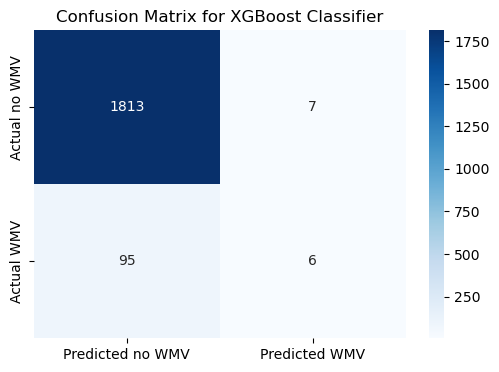

In [58]:
# Check the model's confusion matrix
y_test_pred_best = best_xgb_classifier.predict(X_test)
confusion_matrix(y_test, y_test_pred_best)

# plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)
cm_df = pd.DataFrame(cm, columns=['Predicted no WMV', 'Predicted WMV'], index=['Actual no WMV', 'Actual WMV'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [59]:
# Provide accuracy score, sensitivity, specificity, precision, and F1 score
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_best).ravel()
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred_best):.4f}')
print(f'Sensitivity: {tp / (tp + fn):.4f}')
print(f'Specificity: {tn / (tn + fp):.4f}')
print(f'Precision: {tp / (tp + fp):.4f}')
print(f'F1 Score: {2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn))):.4f}')


Accuracy Score: 0.9469
Sensitivity: 0.0594
Specificity: 0.9962
Precision: 0.4615
F1 Score: 0.1053


In [60]:
# Create decision tree visualizations to check the importance of features
import matplotlib.pyplot as plt
from xgboost import plot_tree

tree_index = 3

# Plot the specified tree
plot_tree(best_xgb_classifier, num_trees=tree_index, rankdir='LR')  # Set rankdir to 'LR' for horizontal layout
plt.rcParams['figure.figsize'] = [250, 150]  # Adjust figure size as needed
plt.show()

#### Error summary
Sensitivity (TP/TP+FN) is not good at all, only 5%. Due to baseline, model is likely to predict mostly no WMV. The AUC-ROC is also at 0.53. Both of them indicate the True Positive over Total actual positive case is very poor. 

Let's get back to EDA, and do further feature engineering

---

## Modeling after feature engineering

After features engineered, let fit to XGBoot model with gridsearch to find the best parameters.

In [61]:
# Try model on new prepare data
df_train_im = pd.read_csv('../data/train_df_im.csv')
df_test_im = pd.read_csv('../data/test_df_im.csv')

In [62]:
# Create X and y and split the data for Train and Test for Modeling
X = df_train_im.drop('WnvPresent', axis=1)
y = df_train_im['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)

Default XGBoost Model:
Test ROC AUC Score (Default): 0.84

Best XGBoost Model (Grid Search):
Best Parameters: {'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1}
Test ROC AUC Score (Grid Search): 0.85


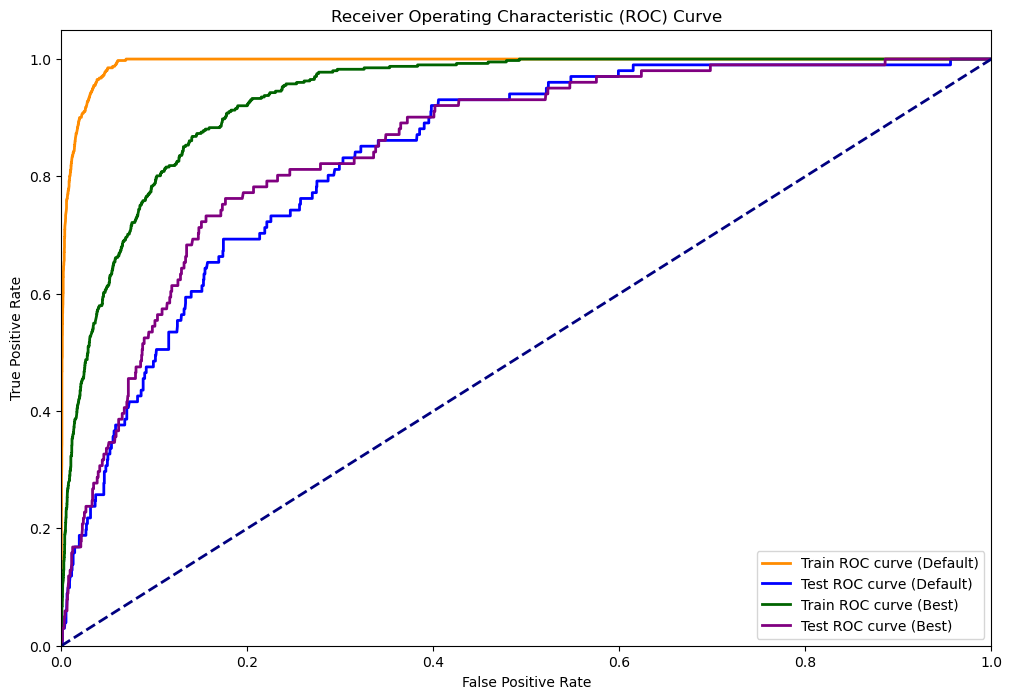

In [63]:
# Using XGBoost

#Step 1: Create a default XGBoost model
default_xgb_model = XGBClassifier(random_state=42)

# Step 2: Train the default XGBoost model on the training data
default_xgb_model.fit(X_train, y_train)

# Step 3: Make predictions on the train and test data using the default model
y_train_pred_default = default_xgb_model.predict_proba(X_train)[:,1]
y_test_pred_default = default_xgb_model.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the default model on train and test data
train_roc_auc_default = roc_auc_score(y_train, y_train_pred_default)
test_roc_auc_default = roc_auc_score(y_test, y_test_pred_default)

# Store the default model's estimator, parameters, and ROC AUC scores
default_estimator = default_xgb_model
default_parameters = default_xgb_model.get_params()
default_score = test_roc_auc_default

# Step 4: Define an extended hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 1.0]
}

# Step 5: Create an XGBoost model for grid search
grid_search_xgb_model = XGBClassifier(random_state=42)

# Step 6: Perform grid search with ROC AUC scoring
grid_search = GridSearchCV(grid_search_xgb_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_xgb_classifier = grid_search.best_estimator_

# Step 8: Make predictions on the train and test data using the best XGBoost model
y_train_pred_best = best_xgb_classifier.predict_proba(X_train)[:,1]
y_test_pred_best = best_xgb_classifier.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the best model on train and test data
train_roc_auc_best = roc_auc_score(y_train, y_train_pred_best)
test_roc_auc_best = roc_auc_score(y_test, y_test_pred_best)

# Store the best model's estimator, parameters, and ROC AUC scores
best_estimator = best_xgb_classifier
best_parameters = best_params
best_score = test_roc_auc_best

# Print the best parameters and ROC AUC scores
print("Default XGBoost Model:")
print(f"Test ROC AUC Score (Default): {test_roc_auc_default:.2f}")

print("\nBest XGBoost Model (Grid Search):")
print(f"Best Parameters: {best_parameters}")
print(f"Test ROC AUC Score (Grid Search): {test_roc_auc_best:.2f}")

# Step 9: Calculate and plot the ROC curves for both models
y_train_prob_default = default_xgb_model.predict_proba(X_train)[:, 1]
y_test_prob_default = default_xgb_model.predict_proba(X_test)[:, 1]

y_train_prob_best = best_xgb_classifier.predict_proba(X_train)[:, 1]
y_test_prob_best = best_xgb_classifier.predict_proba(X_test)[:, 1]

fpr_train_default, tpr_train_default, _ = roc_curve(y_train, y_train_prob_default)
fpr_test_default, tpr_test_default, _ = roc_curve(y_test, y_test_prob_default)

fpr_train_best, tpr_train_best, _ = roc_curve(y_train, y_train_prob_best)
fpr_test_best, tpr_test_best, _ = roc_curve(y_test, y_test_prob_best)

plt.figure(figsize=(12, 8))

# ROC curve for the default model
plt.plot(fpr_train_default, tpr_train_default, color='darkorange', lw=2, label='Train ROC curve (Default)')
plt.plot(fpr_test_default, tpr_test_default, color='blue', lw=2, label='Test ROC curve (Default)')

# ROC curve for the best model
plt.plot(fpr_train_best, tpr_train_best, color='darkgreen', lw=2, label='Train ROC curve (Best)')
plt.plot(fpr_test_best, tpr_test_best, color='purple', lw=2, label='Test ROC curve (Best)')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Default XGBoost Model:
Test ROC AUC Score (Default): 0.83

Best XGBoost Model (Grid Search):
Best Parameters: {'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 1.0}
Test ROC AUC Score (Grid Search): 0.83


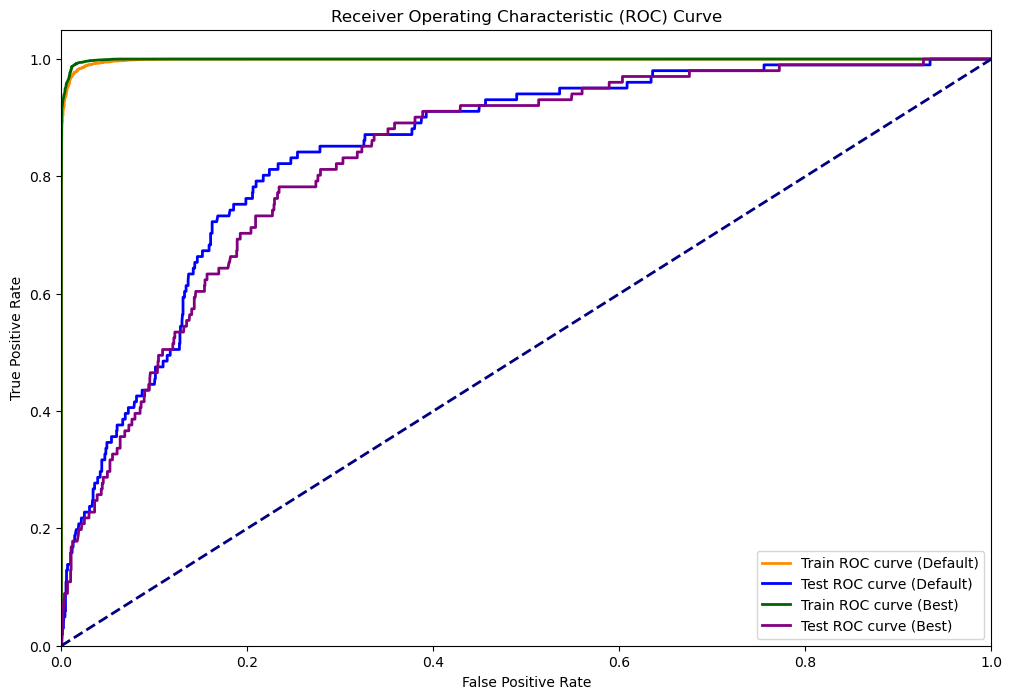

In [64]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Step 1: Create a default XGBoost model
smote_xgb_model = XGBClassifier(random_state=42)

# Step 2: Train the default XGBoost model on the training data
smote_xgb_model.fit(X_train_resampled, y_train_resampled) ##### X train / Y train which already SMOTE

# Step 3: Make predictions on the train and test data using the default model
y_train_pred_smote = smote_xgb_model.predict_proba(X_train_resampled)[:,1]
y_test_pred_smote = smote_xgb_model.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the default model on train and test data
train_roc_auc_smote = roc_auc_score(y_train_resampled, y_train_pred_smote)
test_roc_auc_smote = roc_auc_score(y_test, y_test_pred_smote)

# Store the default model's estimator, parameters, and ROC AUC scores
smote_estimator = smote_xgb_model
smote_parameters = smote_xgb_model.get_params()
smote_score = test_roc_auc_smote

# Step 4: Define an extended hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 1.0]
}

# Step 5: Create an XGBoost model for grid search
grid_search_xgb_model = XGBClassifier(random_state=42)

# Step 6: Perform grid search with ROC AUC scoring
grid_search = GridSearchCV(grid_search_xgb_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 7: Get the best parameters and best estimator from the grid search
best_params_smote = grid_search.best_params_
best_xgb_classifier_smote = grid_search.best_estimator_

# Step 8: Make predictions on the train and test data using the best XGBoost model
y_train_pred_best = best_xgb_classifier_smote.predict_proba(X_train_resampled)[:,1]
y_test_pred_best = best_xgb_classifier_smote.predict_proba(X_test)[:,1]

# Calculate ROC AUC scores for the best model on train and test data
train_roc_auc_best_smote = roc_auc_score(y_train_resampled, y_train_pred_best)
test_roc_auc_best_smote = roc_auc_score(y_test, y_test_pred_best)

# Store the best model's estimator, parameters, and ROC AUC scores
best_estimator = best_xgb_classifier_smote
best_parameters = best_params_smote
best_score = test_roc_auc_best_smote

# Print the best parameters and ROC AUC scores
print("Default XGBoost Model:")
print(f"Test ROC AUC Score (Default): {test_roc_auc_best_smote:.2f}")

print("\nBest XGBoost Model (Grid Search):")
print(f"Best Parameters: {best_parameters}")
print(f"Test ROC AUC Score (Grid Search): {test_roc_auc_best_smote:.2f}")

# Step 9: Calculate and plot the ROC curves for both models
y_train_prob_default = smote_xgb_model.predict_proba(X_train_resampled)[:, 1]
y_test_prob_default = smote_xgb_model.predict_proba(X_test)[:, 1]

y_train_prob_best = best_xgb_classifier_smote.predict_proba(X_train_resampled)[:, 1]
y_test_prob_best = best_xgb_classifier_smote.predict_proba(X_test)[:, 1]

fpr_train_default, tpr_train_default, _ = roc_curve(y_train_resampled, y_train_prob_default)
fpr_test_default, tpr_test_default, _ = roc_curve(y_test, y_test_prob_default)

fpr_train_best, tpr_train_best, _ = roc_curve(y_train_resampled, y_train_prob_best)
fpr_test_best, tpr_test_best, _ = roc_curve(y_test, y_test_prob_best)

plt.figure(figsize=(12, 8))

# ROC curve for the default model
plt.plot(fpr_train_default, tpr_train_default, color='darkorange', lw=2, label='Train ROC curve (Default)')
plt.plot(fpr_test_default, tpr_test_default, color='blue', lw=2, label='Test ROC curve (Default)')

# ROC curve for the best model
plt.plot(fpr_train_best, tpr_train_best, color='darkgreen', lw=2, label='Train ROC curve (Best)')
plt.plot(fpr_test_best, tpr_test_best, color='purple', lw=2, label='Test ROC curve (Best)')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
# Plot the decision tree

tree_index = 3

# Plot the specified tree
plot_tree(best_xgb_classifier, num_trees=tree_index, rankdir='LR')  # Set rankdir to 'LR' for horizontal layout
plt.rcParams['figure.figsize'] = [250, 150]  # Adjust figure size as needed
plt.show()

In [66]:
# Set X_actual
X_actual = df_test_im

In [67]:
# number of features (columns)
X_actual.shape

(116293, 71)

In [68]:
# make sure columne in test and train are sme

for col in X.columns : # iterate all columns in train data
    if col not in X_actual.columns: # if the column is not in test data
        X_actual[col] = 0 # make the column filled with 0 values

X_actual = X_actual[X.columns] # drop "columns exist only in test data" and sort in the same order

In [69]:
# Apply model to predict
y_act = best_xgb_classifier.predict_proba(X_actual)[:,1]

In [70]:
df_submission2 = pd.DataFrame({'Id': df_test['Id'], 'WnvPresent': y_act})
# export df_submission to csv
df_submission2.to_csv('../data/submission2.csv', index=False)

In [71]:
# Apply model to predict
y_act_smote = best_xgb_classifier_smote.predict_proba(X_actual)[:,1]

In [72]:
df_submission_smote2 = pd.DataFrame({'Id': df_test['Id'], 'WnvPresent': y_act_smote})
# export df_submission to csv
df_submission_smote2.to_csv('../data/submission_smote2.csv', index=False)

#### Result

AUC-ROC result improved from before.
When submitted to Kaggle, non-smote receive 0.7214 and smote model receive 0.7210.
Both score improved from feature engineering. This seem to be working.
